<a href="https://colab.research.google.com/github/NadiaLayraAziza/PCVK_Genap_2022/blob/main/Tubes_PCVK_Nadia_Tita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Canny dan Hitung luas berdasarkan ukuran X dan Y

Image Asli


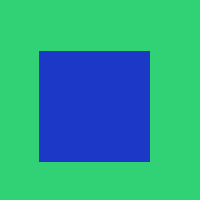

Masking warna pada HSV untuk mendapatkan warna objek yang diinginkan


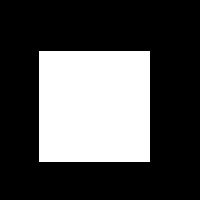

Hasil Konversi RGB ke HSV


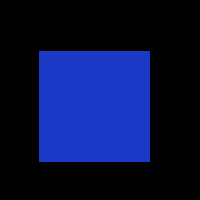

Hasil deteksi bentuk objek dengan canny


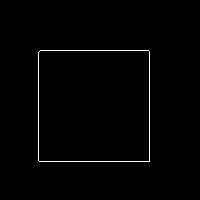

Segi Empat
w = 112 pixel, h = 112 pixel
w = 2.9632959999999997 cm, h = 2.9632959999999997 cm
Luas = 8.781123183615998 cm^2
Keliling = 11.853183999999999 cm


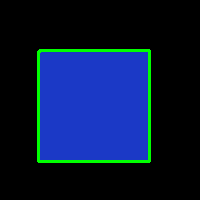

In [ ]:
# Import library
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import math

image = cv2.imread("/content/drive/MyDrive/PCVK/FinalProject/Square_cf5f3a36-2a9a-11ea-8123-8363a7ec19e6.png")
print("Image Asli")
cv2_imshow(image)

result = image.copy()

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# define range of mask color in HSV
# Mask Blue
lower_mask = np.array([90,100,145])
upper_mask = np.array([120,255,255])
# Mask Red
# lower_mask = np.array([136,87,111])
# upper_mask = np.array([180,255,255])
# Mask Yellow
# lower_mask = np.array([22,60,200])
# upper_mask = np.array([60,255,255])

# Threshold the HSV image to get only mask colors
full_mask = cv2.inRange(hsv, lower_mask, upper_mask)
print("Masking warna pada HSV untuk mendapatkan warna objek yang diinginkan")
cv2_imshow(full_mask)

result = cv2.bitwise_and(result, result, mask=full_mask)
print("Hasil Konversi RGB ke HSV")
cv2_imshow(result)

# Deteksi tepi objek dengan canny
edges = cv2.Canny(result,150,300)
print("Hasil deteksi bentuk objek dengan canny")
cv2_imshow(edges)

# Mencari Kontur dari hasil canny edge dan mengaplikasikannya ke image asli
(cnts, _) = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnts in cnts:
  # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        cnts, 0.01 * cv2.arcLength(cnts, True), True)
      
    # using drawContours() function
    cv2.drawContours(result, [cnts], 0, (0, 255, 0), 2)
    
    # Proses mencari lebar & tinggi untuk menghitung Luas Objek
    x,y,w,h = cv2.boundingRect(edges)
    width_cm = w*0.026458
    heigt_cm = h*0.026458
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        print("Segitiga")
        luas = 0.5*width_cm*heigt_cm
        hipotenusa = int(math.sqrt(heigt_cm ** 2 + width_cm ** 2))
        keliling = width_cm + (2*hipotenusa)
  
    elif len(approx) == 4:
        print("Segi Empat")
        luas = width_cm*heigt_cm
        keliling = (2*width_cm)+(2*heigt_cm)
  
    else:
        print("Lingkaran")
        luas = 3.14*((width_cm/2)**2)
        keliling = 2*3.14*(width_cm/2)
  
# Menampilkan ukuran lebar & tinggi 
print("w = {} pixel, h = {} pixel".format(w,h))
print("w = {} cm, h = {} cm".format(width_cm,heigt_cm))

# Menampilkan Hasil Luas & Keliling
print("Luas = {} cm^2".format(luas))
print("Keliling = {} cm".format(keliling))
cv2_imshow(result)

# Hitung Luas dengan Algoritma Morfologi

Citra Input (Citra Asli)


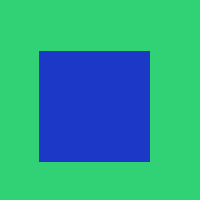

Citra Biner


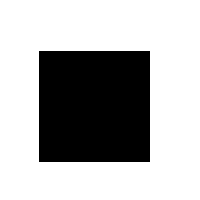

Citra negasi Biner agar objek ditunjukkan dengan warna putih


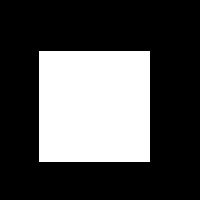

Citra connected-component labeling


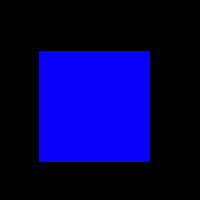

Luas: 12321 pixel
Luas: 8.55625 cm^2


In [ ]:
# Import library
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
import skimage.measure

# Baca Citra
image = cv2.imread("/content/drive/MyDrive/PCVK/FinalProject/Square_cf5f3a36-2a9a-11ea-8123-8363a7ec19e6.png")
print("Citra Input (Citra Asli)")
cv2_imshow(image)

# Ubah Citra ke bentuk biner
# thresh = 127
grayImg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY)[1]
print("Citra Biner")
cv2_imshow(thresh)

# Negasi citra
if thresh[0, x] == 255:
  negasi_img = ~thresh
  print("Citra negasi Biner agar objek ditunjukkan dengan warna putih")
  cv2_imshow(negasi_img)
# Applying cv2.connectedComponents() 
  num_labels, labels = cv2.connectedComponents(negasi_img)
else:
  num_labels, labels = cv2.connectedComponents(thresh)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)

# set bg label to black
labeled_img[label_hue==0] = 0

# Hitung  jumlah pixel yang masuk pada connected-component
img_area = cv2.cvtColor(labeled_img, cv2.COLOR_RGB2GRAY)
area = cv2.countNonZero(img_area)
area_cm = area/1440

# menampilkan Hasil
print("Citra connected-component labeling")
cv2_imshow(labeled_img)
print("Luas: {} pixel".format(area))
print("Luas: {} cm^2".format(area_cm))

# Keliling dengan algoritma Morfologi

Citra Input (Citra Asli)


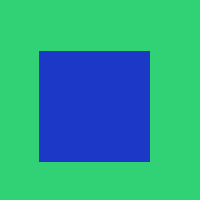

Citra Biner


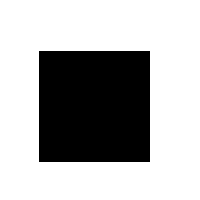

Citra negasi Biner agar objek ditunjukkan dengan warna putih


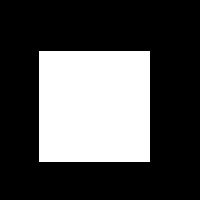

Citra Dilasi


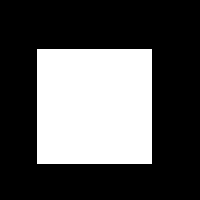

Citra Erosi


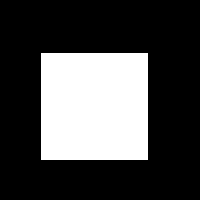

Citra Morphological Gradient


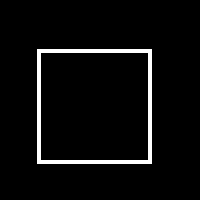

Citra connected-component labeling


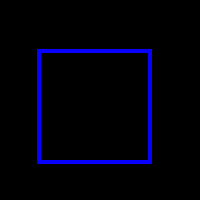

Keliling: 1776 pixel
Keliling: 11.68421052631579 cm


In [ ]:
# Import library
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
import skimage.measure

# Baca Citra
image = cv2.imread("/content/drive/MyDrive/PCVK/FinalProject/Square_cf5f3a36-2a9a-11ea-8123-8363a7ec19e6.png")
print("Citra Input (Citra Asli)")
cv2_imshow(image)

# Ubah Citra ke bentuk biner
# thresh = 127
grayImg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY)[1]
print("Citra Biner")
cv2_imshow(thresh)

# Menentukan strel (structuring element) yang digunakan 
mask = np.ones((5,5), np.uint8) #square

# Negasi citra
if thresh[0, x] == 255:
  negasi_img = ~thresh
  print("Citra negasi Biner agar objek ditunjukkan dengan warna putih")
  cv2_imshow(negasi_img)
  # Operasi Dilasi
  img_dilasi = cv2.morphologyEx(negasi_img, cv2.MORPH_DILATE, mask)

  # Operasi erosi
  img_erosi = cv2.morphologyEx(negasi_img, cv2.MORPH_ERODE, mask)

else:
  # Operasi Dilasi
  img_dilasi = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, mask)

  # Operasi erosi
  img_erosi = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, mask)

# Menampilkan Citra Hasil Dilasi dan Erosi
print("Citra Dilasi")
cv2_imshow(img_dilasi)
print("Citra Erosi")
cv2_imshow(img_erosi)

# Operasi morphological gradient (dilated_image – eroded_image)
morph_gradient = img_dilasi - img_erosi
print("Citra Morphological Gradient")
cv2_imshow(morph_gradient)

# Applying cv2.connectedComponents() 
num_labels, labels = cv2.connectedComponents(morph_gradient)
# else:
  # num_labels, labels = cv2.connectedComponents(thresh)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)
# set bg label to black
labeled_img[label_hue==0] = 0
print("Citra connected-component labeling")
cv2_imshow(labeled_img)

# Hitung jumlah pixel yang masuk pada connected-component
img_keliling = cv2.cvtColor(labeled_img, cv2.COLOR_RGB2GRAY)
keliling = cv2.countNonZero(img_keliling)
keliling_cm = keliling/152
print("Keliling: {} pixel".format(keliling))
print("Keliling: {} cm".format(keliling_cm))